<h1>Topic Modelling with KMeans text clustering</h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv('../result_clean.csv')
df

,platform,date,body,token_words,lemmatized,clean_body,label
0,Twitter,30-12-2021 18:38:04,adidas Yeezy Boost 350 V2 “Dazzling Blue” 👟\n\...,"['adidas', 'yeezy', 'boost', 'dazzling', 'blue...","['adidas', 'yeezy', 'boost', 'dazzling', 'blue...",yeezy boost dazzling blue coming yankeekicks ig,adidas
1,Twitter,30-12-2021 17:43:37,Am over the worst of Omicron. Alhumdullilah. I...,"['worst', 'omicron', 'alhumdullilah', 'cupcake...","['worst', 'omicron', 'alhumdullilah', 'cupcake...",worst omicron alhumdullilah cupcake breakfast ...,adidas
2,Twitter,30-12-2021 06:28:19,🎁 I'm blessing 1 follower with life changing N...,"['blessing', 'follower', 'life', 'changing', '...","['blessing', 'follower', 'life', 'changing', '...",blessing follower life changing nfts hour orig...,adidas
3,Twitter,29-12-2021 22:31:57,South Park and adidas have a new “Professor Ch...,"['south', 'park', 'adidas', 'professor', 'chao...","['south', 'park', 'adidas', 'professor', 'chao...",south park professor chaos nmd releasing,adidas
4,Twitter,29-12-2021 19:29:20,"Please patronise me, I sell Adidas shoes for 1...","['patronise', 'sell', 'adidas', 'shoes', 'fake...","['patronise', 'sell', 'adidas', 'shoe', 'fake'...",patronise sell shoe fake walk fast notice,adidas
...,...,...,...,...,...,...,...
18130,HardwareZone,20-08-2008 01:52:51,jus came back from hk.\n\n\nAdidas Factory out...,"['jus', 'hk', 'adidas', 'factory', 'outlet', '...","['jus', 'hk', 'adidas', 'factory', 'outlet', '...",jus hk factory outlet location block hong kon...,adidas
18131,HardwareZone,24-08-2008 15:03:34,Me and hubby like Citygate leh. Polo Ralph Pol...,"['hubby', 'citygate', 'leh', 'polo', 'ralph', ...","['hubby', 'citygate', 'leh', 'polo', 'ralph', ...",hubby citygate leh polo ralph polo tee pretty ...,adidas and nike
18132,HardwareZone,11-10-2008 04:19:53,"helpp!\n\nOkay, I am from Toronto & I'm going ...","['helpp', 'toronto', 'hong', 'kong', 'december...","['helpp', 'toronto', 'hong', 'kong', 'december...",helpp toronto hong kong december long wanna sh...,nike
18133,HardwareZone,30-10-2008 17:28:01,hihi... sorry all just wanna ask.. so the post...,"['hihi', 'wanna', 'post', 'guide', 'monkey', '...","['hihi', 'wanna', 'post', 'guide', 'monkey', '...",hihi wanna post guide monkey post addidas shi...,nike


In [3]:
vectorizer = TfidfVectorizer(sublinear_tf=True, min_df=5, max_df=0.95)
tf = vectorizer.fit_transform(df['clean_body'].astype('U')).toarray()
tf_feature_names = vectorizer.get_feature_names_out()
tf_feature_names

array(['aa', 'aapl',
       'aaplrstockscommentsrqlcswhatareyourtoppicksforametaverseportfoliohqdhgo',
       ..., 'zwrot', 'zx', 'zyon'], dtype=object)

In [4]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(tf)
clusters = kmeans.labels_
clusters

array([2, 3, 2, ..., 2, 2, 2])

In [5]:
pca = PCA(n_components=2, random_state=42)
pca_vecs = pca.fit_transform(tf)
x0 = pca_vecs[:, 0]
x1 = pca_vecs[:, 1]

In [6]:
df['cluster'] = clusters
df['x0'] = x0
df['x1'] = x1
df

,platform,date,body,token_words,lemmatized,clean_body,label,cluster,x0,x1
0,Twitter,30-12-2021 18:38:04,adidas Yeezy Boost 350 V2 “Dazzling Blue” 👟\n\...,"['adidas', 'yeezy', 'boost', 'dazzling', 'blue...","['adidas', 'yeezy', 'boost', 'dazzling', 'blue...",yeezy boost dazzling blue coming yankeekicks ig,adidas,2,-0.015439,0.047531
1,Twitter,30-12-2021 17:43:37,Am over the worst of Omicron. Alhumdullilah. I...,"['worst', 'omicron', 'alhumdullilah', 'cupcake...","['worst', 'omicron', 'alhumdullilah', 'cupcake...",worst omicron alhumdullilah cupcake breakfast ...,adidas,3,-0.021554,-0.034041
2,Twitter,30-12-2021 06:28:19,🎁 I'm blessing 1 follower with life changing N...,"['blessing', 'follower', 'life', 'changing', '...","['blessing', 'follower', 'life', 'changing', '...",blessing follower life changing nfts hour orig...,adidas,2,-0.021139,-0.026503
3,Twitter,29-12-2021 22:31:57,South Park and adidas have a new “Professor Ch...,"['south', 'park', 'adidas', 'professor', 'chao...","['south', 'park', 'adidas', 'professor', 'chao...",south park professor chaos nmd releasing,adidas,2,-0.016808,-0.006665
4,Twitter,29-12-2021 19:29:20,"Please patronise me, I sell Adidas shoes for 1...","['patronise', 'sell', 'adidas', 'shoes', 'fake...","['patronise', 'sell', 'adidas', 'shoe', 'fake'...",patronise sell shoe fake walk fast notice,adidas,0,-0.025978,-0.062553
...,...,...,...,...,...,...,...,...,...,...
18130,HardwareZone,20-08-2008 01:52:51,jus came back from hk.\n\n\nAdidas Factory out...,"['jus', 'hk', 'adidas', 'factory', 'outlet', '...","['jus', 'hk', 'adidas', 'factory', 'outlet', '...",jus hk factory outlet location block hong kon...,adidas,2,-0.017085,-0.021831
18131,HardwareZone,24-08-2008 15:03:34,Me and hubby like Citygate leh. Polo Ralph Pol...,"['hubby', 'citygate', 'leh', 'polo', 'ralph', ...","['hubby', 'citygate', 'leh', 'polo', 'ralph', ...",hubby citygate leh polo ralph polo tee pretty ...,adidas and nike,2,-0.015435,-0.020321
18132,HardwareZone,11-10-2008 04:19:53,"helpp!\n\nOkay, I am from Toronto & I'm going ...","['helpp', 'toronto', 'hong', 'kong', 'december...","['helpp', 'toronto', 'hong', 'kong', 'december...",helpp toronto hong kong december long wanna sh...,nike,2,0.037555,0.052771
18133,HardwareZone,30-10-2008 17:28:01,hihi... sorry all just wanna ask.. so the post...,"['hihi', 'wanna', 'post', 'guide', 'monkey', '...","['hihi', 'wanna', 'post', 'guide', 'monkey', '...",hihi wanna post guide monkey post addidas shi...,nike,2,-0.015447,-0.019785


In [7]:
def get_top_keywords(n_terms):
    """This function returns the keywords for each centroid of the KMeans"""
    df = pd.DataFrame(tf).groupby(clusters).mean() # groups the TF-IDF vector by cluster
    for i, r in df.iterrows():
        print('\nCluster {}'.format(i))
        # for each row of the dataframe, find the n terms that have the highest tf idf score
        print(', '.join([tf_feature_names[t] for t in np.argsort(r)[-n_terms:]]))
        
get_top_keywords(10)


Cluster 0
year, size, bought, good, foot, buy, wear, running, pair, shoe

Cluster 1
jordan, monarch, offwhite, react, travis, scott, patta, force, max, air

Cluster 2
kit, blackpink, people, buy, wearing, wear, time, brand, year, yeezy

Cluster 3
luck, city, store, pair, size, quality, swoosh, day, jersey, good

Cluster 4
blue, coming, release, upcoming, high, low, image, official, sb, dunk


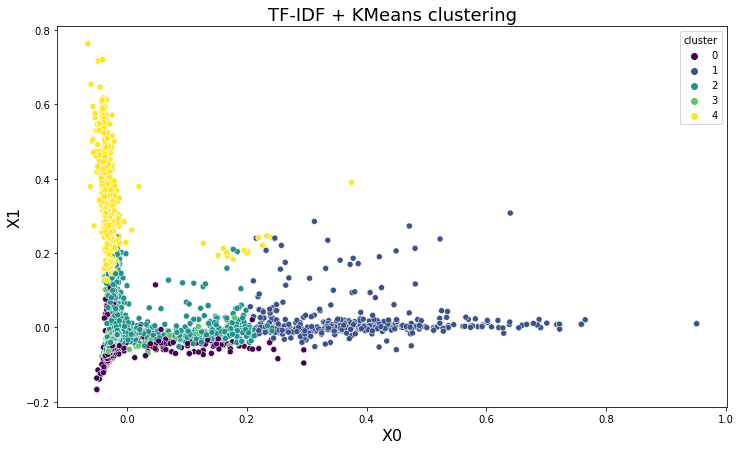

In [8]:
plt.figure(figsize=(12, 7))
plt.title("TF-IDF + KMeans clustering", fontdict={"fontsize": 18})
plt.xlabel("X0", fontdict={"fontsize": 16})
plt.ylabel("X1", fontdict={"fontsize": 16})
sns.scatterplot(data=df, x='x0', y='x1', hue='cluster', palette="viridis")
plt.show()